# Đồ án cuối kỳ

Họ tên: Võ Nhật Thịnh

MSSV: 1712796


# 1. nguồn dữ liệu

>Khái quát về dữ liệu:

Bộ dữ liệu cung cấp thông tin tình hình dịch COVID-19 đang diễn ra trên thế giới, mức độ lây lan của chúng, tổng số ca mắc, ca qua khỏi và ca tử vong theo thời gian thực, tức bộ dữ liệu luôn được cập nhật từng ngày từng giờ giúp ta có 1 cái nhìn trực quan nhất về dịch

Nguồn dữ liệu: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

>license của chủ đề:

Bộ dữ liệu có bản quyền thuộc về Creative Commons Attribution 4.0 International (CC BY 4.0) của trường Johns Hopkins University
để sử dụng bộ dữ liệu cho mục đích nghiên cứu, ta trích dẫn nguồn dữ liệu:

"Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1"

chi tiết tham khảo: https://github.com/CSSEGISandData/COVID-19/blob/master/README.md

> cách dữ liệu được thu thập:

nguồn dữ liệu được thu thập từ 3 nguồn chính: 

    data tổng hợp từ các tổ chức lớn trên thế giới (WHO, ECDC, DXY,..)
    
    data từ các bang của US
    
    data từ các nước/ vùng khác ngoài US

# 2. khám phá dữ liệu

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

ở đây bộ dữ liệu gồm 8 file, ta tiến hành xem qua từng để có 1 cái nhìn tổng quan cấu trúc file dữ liệu. ta dễ dàng thấy bộ dữ liệu gồm 2 loại file: 

tập các file time series: thể hiện các loại ca mắc bệnh theo ngày

tập các file COVID-19: chi tiết nhật ký ghi lại các ca mắc COVID-19

### Đọc dữ liệu vào dataframe

In [2]:
#nạp các file vào biến
covid_19_data = pd.read_csv('covid_19_data.csv')
COVID19_line_list_data = pd.read_csv('COVID19_line_list_data.csv')
COVID19_open_line_list = pd.read_csv('COVID19_open_line_list.csv')

time_series_covid_19_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
time_series_covid_19_confirmed_US = pd.read_csv('time_series_covid_19_confirmed_US.csv')
time_series_covid_19_deaths = pd.read_csv('time_series_covid_19_deaths.csv')
time_series_covid_19_deaths_US = pd.read_csv('time_series_covid_19_deaths_US.csv')
time_series_covid_19_recovered = pd.read_csv('time_series_covid_19_recovered.csv')

Vì đây là bộ dữ liệu được tổng hợp từ nhiều nguồn nên khả năng dữ liệu bị lỗi hay missing value thì không thể tránh được. với khả năng hiện tại thì ta chỉ xử lý lỗi missing value

In [3]:
# file covid_19_data.csv:
f = covid_19_data
miss_f = [(c, f[c].isna().mean()*100) for c in f]
miss_f = pd.DataFrame(miss_f, columns=["column_name", "percentage"])
miss_f

,column_name,percentage
0,SNo,0.000000
1,ObservationDate,0.000000
2,Province/State,31.989631
3,Country/Region,0.000000
4,Last Update,0.000000
5,Confirmed,0.000000
6,Deaths,0.000000
7,Recovered,0.000000


In [4]:
f = COVID19_line_list_data
miss_f = [(c, f[c].isna().mean()*100) for c in f]
miss_f = pd.DataFrame(miss_f, columns=["column_name", "percentage"])
miss_f

,column_name,percentage
0,id,0.000000
1,case_in_country,18.156682
2,reporting date,0.092166
3,Unnamed: 3,100.000000
4,summary,0.460829
5,location,0.000000
6,country,0.000000
7,gender,16.866359
8,age,22.304147
9,symptom_onset,48.110599


In [5]:
f = COVID19_open_line_list
miss_f = [(c, f[c].isna().mean()*100) for c in f]
miss_f = pd.DataFrame(miss_f, columns=["column_name", "percentage"])
miss_f

,column_name,percentage
0,ID,6.746425
1,age,90.450234
2,sex,91.051961
3,city,27.835198
4,province,8.636557
5,country,6.923404
6,wuhan(0)_not_wuhan(1),6.767662
7,latitude,6.930483
8,longitude,6.930483
9,geo_resolution,6.930483


In [6]:
f = time_series_covid_19_confirmed
miss_f = [(c, f[c].isna().mean()*100) for c in f]
miss_f = pd.DataFrame(miss_f, columns=["column_name", "percentage"])
miss_f

,column_name,percentage
0,Province/State,69.548872
1,Country/Region,0.000000
2,Lat,0.000000
3,Long,0.000000
4,1/22/20,0.000000
...,...,...
216,8/21/20,0.000000
217,8/22/20,0.000000
218,8/23/20,0.000000
219,8/24/20,0.000000


In [7]:
f = time_series_covid_19_confirmed_US
miss_f = [(c, f[c].isna().mean()*100) for c in f]
miss_f = pd.DataFrame(miss_f, columns=["column_name", "percentage"])
miss_f

,column_name,percentage
0,UID,0.000000
1,iso2,0.000000
2,iso3,0.000000
3,code3,0.000000
4,FIPS,0.299401
...,...,...
223,8/21/20,0.000000
224,8/22/20,0.000000
225,8/23/20,0.000000
226,8/24/20,0.000000


In [8]:
f = time_series_covid_19_deaths
miss_f = [(c, f[c].isna().mean()*100) for c in f]
miss_f = pd.DataFrame(miss_f, columns=["column_name", "percentage"])
miss_f

,column_name,percentage
0,Province/State,69.548872
1,Country/Region,0.000000
2,Lat,0.000000
3,Long,0.000000
4,1/22/20,0.000000
...,...,...
216,8/21/20,0.000000
217,8/22/20,0.000000
218,8/23/20,0.000000
219,8/24/20,0.000000


In [9]:
f = time_series_covid_19_deaths_US
miss_f = [(c, f[c].isna().mean()*100) for c in f]
miss_f = pd.DataFrame(miss_f, columns=["column_name", "percentage"])
miss_f

,column_name,percentage
0,UID,0.000000
1,iso2,0.000000
2,iso3,0.000000
3,code3,0.000000
4,FIPS,0.299401
...,...,...
224,8/21/20,0.000000
225,8/22/20,0.000000
226,8/23/20,0.000000
227,8/24/20,0.000000


In [10]:
f = time_series_covid_19_recovered
miss_f = [(c, f[c].isna().mean()*100) for c in f]
miss_f = pd.DataFrame(miss_f, columns=["column_name", "percentage"])
miss_f

,column_name,percentage
0,Province/State,73.517787
1,Country/Region,0.000000
2,Lat,0.000000
3,Long,0.000000
4,1/22/20,0.000000
...,...,...
216,8/21/20,0.000000
217,8/22/20,0.000000
218,8/23/20,0.000000
219,8/24/20,0.000000


như ta đã dự đoán từ trước, bộ dữ liệu trên có rất nhiều giá trị missing value, để tránh việc khó khăn trong phân tích dữ liệu, ta sẽ lấy file có độ lỗi nhỏ nhất để phân tích, ở đây ta sử dụng file covid_19_data.csv

tiếp theo ta điền các giá trị missing value cho file covid_19_data.csv:

In [11]:
covid_19_data["Province/State"]= covid_19_data["Province/State"].fillna('Unknown')

### thể hiện tổng quan về file

In [12]:
covid_19_data = pd.read_csv('covid_19_data.csv')
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### các thuộc tính của data

In [13]:
rows, columns =covid_19_data.shape
print("num rows: {}, num column: {} (data in 27/08/2020)".format(rows,columns))
covid_19_data.info()

num rows: 95284, num column: 8 (data in 27/08/2020)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95284 entries, 0 to 95283
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              95284 non-null  int64  
 1   ObservationDate  95284 non-null  object 
 2   Province/State   64803 non-null  object 
 3   Country/Region   95284 non-null  object 
 4   Last Update      95284 non-null  object 
 5   Confirmed        95284 non-null  float64
 6   Deaths           95284 non-null  float64
 7   Recovered        95284 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.8+ MB


chi tiết các thuộc tính:

&emsp;&emsp;+ **SNo**: Số se-ri <br>
&emsp;&emsp;+ **ObservationDate**: ngày phát hiện theo định dạng MM/DD/YYYY <br>
&emsp;&emsp;+ **Province/State**: tỉnh/bang phát hiện ca mắc <br>
&emsp;&emsp;+ **Country/Region**: quốc gia phát hiện ca mắc <br>
&emsp;&emsp;+ **Last Update**: thời gian ghi nhận ca mắc theo múi giờ UTC nước sở tại <br>
&emsp;&emsp;+ **Confirmed**: lũy kế số ca mắc được xác nhận <br>
&emsp;&emsp;+ **Deaths**: lũy kế số ca mắc không qua khỏi <br>
&emsp;&emsp;+ **Recovered**: lũy kế số ca mắc đã hồi phục <br>

### miền giá trị của các cột numerical/datetime

   - các cột numerical: **SNo**, **Confirmed**, **Deaths**, **Recovered**
   - các cột datetime: **ObservationDate**, **Last Update**
   - các biến catergorical: **Province/State**, **Country/Region**

### các giá trị có thể có đối với cột catergorical

cột này chủ yếu gồm các tên nước, tỉnh, thành phố ở dạng string, tuy nhiên do dữ liệu được thu thập từ nhiều nguồn nên gặp vài vấn đề về đồng bộ tên riêng, tiêu biểu ở đây là tại cột **Country/Region** ta thay các dòng có giá trị "Mainland China" thành "China" để thuận tiện trả lời câu hỏi phía dưới

In [14]:
covid_19_data['Country/Region'] = covid_19_data['Country/Region'].replace('Mainland China', 'China')

# 3. Đưa ra các câu hỏi cần trả lời

## 1. Số ca nhiễm đang chữa trị tại thời điểm hiện tại

ở đây ta sẽ đi tìm số ca đang trong quá trình điều trị tại thời điểm bây giờ, tức là đã được xác nhận mắc COVID-19 tuy nhiên chưa đến giai đoạn đã xác nhận hồi phục hoặc không qua khỏi. Ở đây đơn giản ta chỉ việc lấy số ca đã xác nhận trừ đi cho số ca mắc đã hồi phục và số ca mắc không qua khỏi.
Việc trả lời câu hỏi này sẽ cho ta biết tình hình số ca mắc đang điều trị trên thế giới, qua đó cho ta 1 cái nhìn về nguồn lực y tế thế giới khả năng mạnh yếu tới mức nào

In [15]:
# tính các ca hiện tại đang mắc trên thế giới
covid_19_data['Activated'] = covid_19_data['Confirmed'] - covid_19_data['Deaths'] - covid_19_data['Recovered']

để có 1 cái nhìn thời cuộc nhất về tình hình dịch, ta đảo ngược các mốc thời gian trong file dữ liệu để tìm ca mới nhất

In [16]:
# đảo ngược thời gian trong file để tìm ca mới nhất
Data = covid_19_data[covid_19_data['ObservationDate'] == max(covid_19_data['ObservationDate'])].reset_index()

để thể hiện rõ tỉ lệ các loại ca mắc COVID-19, ở đây có 3 loại (đang mắc, hồi phục và đã mất) thì ta biểu diễn dưới dạng biểu đồ tròn theo phần trăm sẽ cho ta cái nhìn trực quan nhất và dễ so sánh

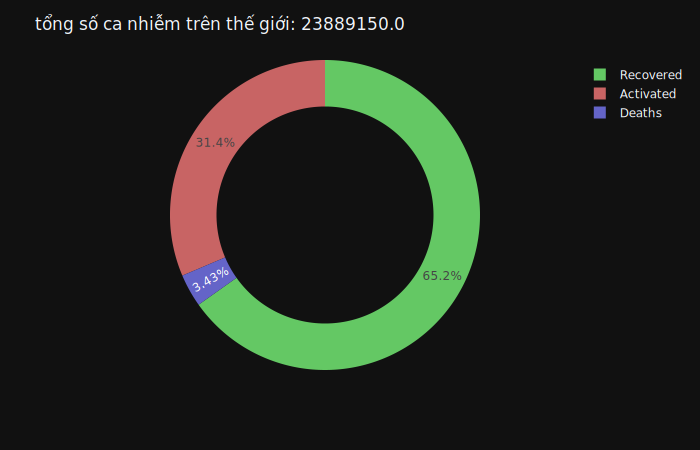

In [17]:
# 1 số biểu đồ trực quan thể hiện tình hình dịch COVID trên thế giới
World = Data.groupby(["ObservationDate"])[["Confirmed","Activated","Deaths","Recovered"]].sum().reset_index()
labels = ["Activated","Recovered","Deaths"]
values = World.loc[0, ["Activated","Recovered","Deaths"]]
fig = px.pie(World, values=values, names=labels,color_discrete_sequence=['rgb(100,200,100)','rgb(200,100,100)','rgb(100,100,200)'],hole=0.7)
fig.update_layout(
    title='tổng số ca nhiễm trên thế giới: ' +str(World["Confirmed"][0]),
    template='plotly_dark',
)
fig.show("svg")

## 2. Tình hình dịch tại Trung Quốc đang diễn biến như thế nào?

Trung Quốc là nơi khởi phát dịch đầu tiên trên thế giới, kể từ tháng 11/2019 đến nay thì đã qua 9 tháng, 1 khoảng thời gian khá dài và trên sách báo hiện thời ít có bài báo tổng hợp lại tính hình dịch tể ở nơi này cũng như tổng hợp lại quá trình dịch bùng phát cho đến khi lắng xuống dần. ta có thể xem Trung Quốc như 1 ví dụ mẫu để có thể chiếu theo đó dự đoán dịch diễn biến tiếp tục như thế nào

#### tiền xử lí dữ liệu:

In [18]:
# tình hình dịch tại Trung Quốc
covid_19_data['Country/Region'] = covid_19_data['Country/Region'].replace('Mainland China', 'China')
Data_China = covid_19_data[(covid_19_data['Country/Region'] == 'China') ].reset_index(drop=True)
Data_China.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Activated
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0,0.0


tương tự như trên ta cũng đảo ngược các dòng để tìm ngày có ca mắc mới nhất ở Trung Quốc

In [19]:
# đảo ngược dòng để lấy ngày mới nhất các ca ở Trung Quốc
Data_china_last = Data_China[Data_China['ObservationDate'] == max(Data_China['ObservationDate'])].reset_index()
Data_china_last.head()

,index,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Activated
0,6694,94733,08/25/2020,Anhui,China,2020-08-26 04:28:11,991.0,6.0,985.0,0.0
1,6695,94766,08/25/2020,Beijing,China,2020-08-26 04:28:11,935.0,9.0,926.0,0.0
2,6696,94815,08/25/2020,Chongqing,China,2020-08-26 04:28:11,583.0,6.0,577.0,0.0
3,6697,94855,08/25/2020,Fujian,China,2020-08-26 04:28:11,375.0,1.0,365.0,9.0
4,6698,94860,08/25/2020,Gansu,China,2020-08-26 04:28:11,169.0,2.0,167.0,0.0


đầu tiên ta xét xem tỉ lệ các tỉnh thành có ca mắc COVID-19 để có 1 cái nhìn tổng quan về phân bổ vị trí mắc COVID-19

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



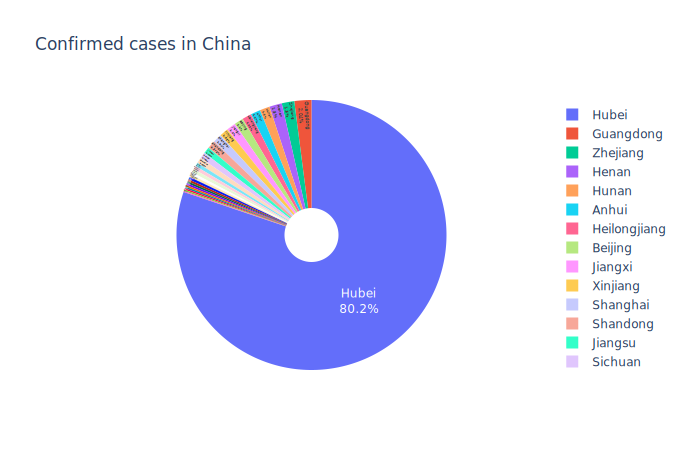

In [20]:
# các ca nhiễm theo vùng ở Trung Quốc
china_per_state= Data_china_last.groupby(["Province/State"])["Confirmed","Activated","Recovered","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)
fig = px.pie(china_per_state, values=china_per_state['Confirmed'], names=china_per_state['Province/State'],
             title='Confirmed cases in China',
            hole=.2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show("svg")

Tiếp theo ta tổng quát hóa các loại ca mắc tại Trung Quốc đến hiện thời

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



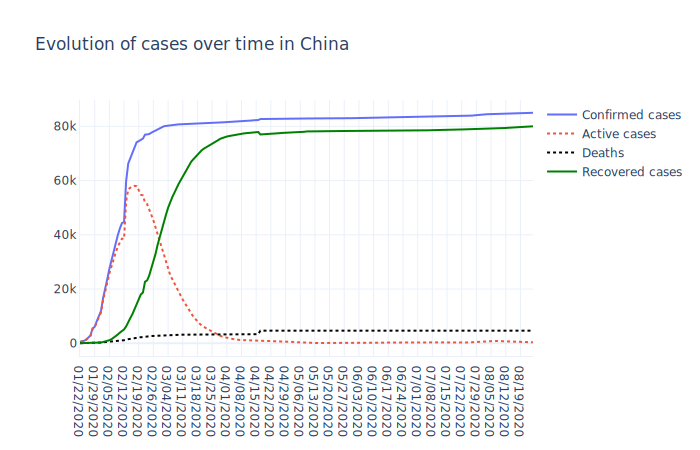

In [21]:
# sự phát triển của dịch bệnh tai Trung Quốc
Time_series_China= Data_China.groupby(["ObservationDate","Country/Region"])["Confirmed","Deaths","Recovered","Activated"].sum().reset_index().reset_index(drop=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=Time_series_China['ObservationDate'], y=Time_series_China['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))


fig.add_trace(go.Scatter(x=Time_series_China['ObservationDate'], y=Time_series_China['Activated'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Time_series_China['ObservationDate'], y=Time_series_China['Deaths'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Time_series_China['ObservationDate'], y=Time_series_China['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))

fig.update_layout(
    title='Evolution of cases over time in China',
        template='plotly_white'

)

fig.show("svg")

đối với các ca đang mắc bệnh, ta tiếp tục đi sâu vào để xét xem tỉnh thành nào có người mắc COVID-19 nhiều nhất

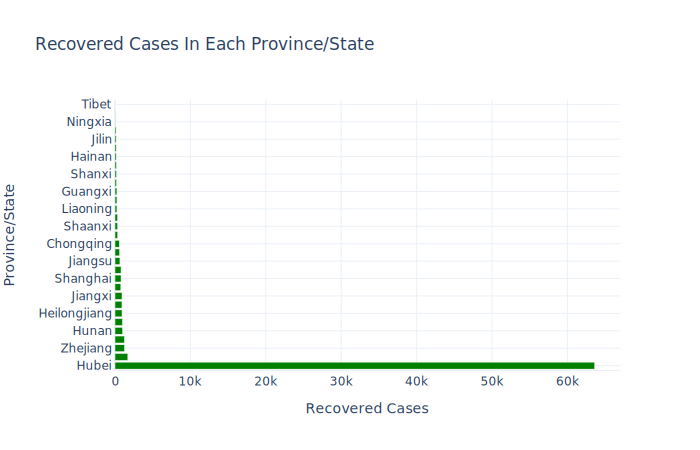

In [29]:
fig = go.Figure(go.Bar(
            x=china_per_state['Recovered'],
            y=china_per_state['Province/State'],
            orientation='h',
            marker_color='green',))
fig.update_layout(
    title='Recovered Cases In Each Province/State',
    template='plotly_white',
    xaxis_title="Recovered Cases",
    yaxis_title="Province/State",
)
fig.show("svg")

## 3. tiếp tục tình hình dịch như thế này dự đoán số ca mắc tại Việt Nam tăng lên bao nhiêu trong thời gian tiếp theo

Trả lời câu hỏi sẽ cho ta biết dịch tể tại VN những ngày tiếp theo sẽ diễn biến như thế nào, việc đi tìm câu trả lời giúp ta có 1 cái nhìn trực quan về dịch cũng như có những giải pháp kịp thời để xử lý

In [23]:
usecolumns =[1] + list(range(4,221))
df = pd.read_csv('time_series_covid_19_confirmed.csv',usecols=usecolumns)
#df = pd.read_csv('time_series_covid_19_deaths.csv',usecols=usecolumns)
df = df.T
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df['Date'] = df.index
country = df.columns.tolist()
countrylist = []
countrylistraw = []
for i in country:
    countryname = i
    if countrylistraw.count(i) >0:
        countryname =countryname+ str(countrylistraw.count(i))
    countrylistraw.append(i)
    countrylist.append(countryname)

ở đây ta sử dụng ARIMA để dự đoán các ca mắc tiếp theo, để thuận tiện cho việc nạp dữ liệu vào model, ta tiến hành convert lại dữ liệu trong đó các cột sẽ là các nước trên thế giới và mỗi hàng sẽ là ngày thể hiện lũy kế số mắc bệnh COVID-19

In [24]:
df.columns = countrylist
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia1,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Date
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1/22/20
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1/23/20
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1/24/20
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1/25/20
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,2,0,0,0,0,0,1/26/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/21/20,37894,8119,40667,1045,2068,94,329043,42477,113,3981,...,1516,38074,38219,1009,18313,10,1906,10627,5815,8/21/20
8/22/20,37953,8275,41068,1045,2134,94,336802,42616,113,3985,...,1521,38532,38957,1014,18476,10,1907,10831,5893,8/22/20
8/23/20,37999,8427,41460,1045,2171,94,342154,42792,113,3988,...,1527,38946,39564,1016,18802,10,1911,11082,5930,8/23/20
8/24/20,38054,8605,41858,1060,2222,94,350867,42825,113,3991,...,1533,39348,40338,1022,19213,10,1916,11148,6070,8/24/20


Text(0.5, 1.0, 'Predict confirmed cases in Viet Nam')

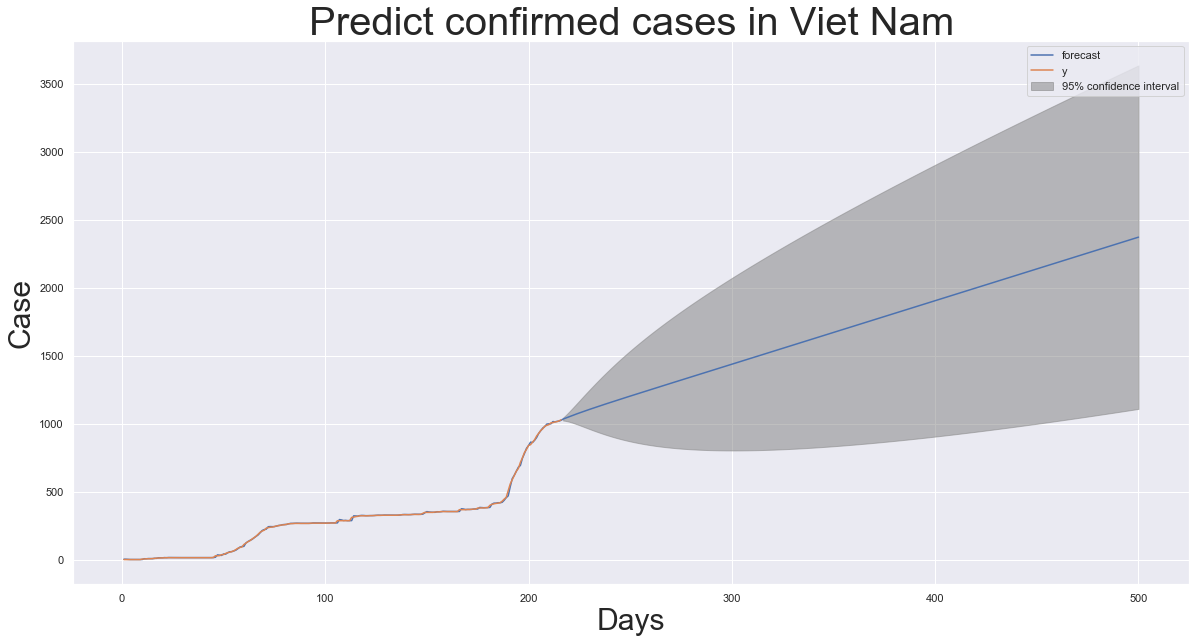

In [25]:
data = pd.Series(list(df['Vietnam']))
model = ARIMA(data, order=(5,1,0)) # bộ tham số của ARIMA
model_fit = model.fit(disp=0)
model = model_fit.plot_predict(1, 500)
plt.xlabel("Days",size = 30)
plt.ylabel("Case",size = 30)
plt.title("Predict confirmed cases in Viet Nam",size = 40)

ta sử dụng model ARIMA để dự đoán số ca mắc tiếp theo tại Việt Nam, trong đó các tham số truyền vào model ARIMA là (5,1,0), bộ tham số này có p = 5 chỉ **mức độ kết hợp các chỉ số trong quá khứ** (tức dựa vào số liệu 5 ngày liền kề trong quá khứ để dự đoán những ngày tiếp theo), **mức độ sai phân** là d = 1 (tức là sự tương đồng giữa các ngày với nhau) và **mức độ trung bình động** của model là q = 0 (tức là mức độ thất thường trong dự đoán)

Dựa theo plot ta dễ dàng thấy, Days ở đây là **số ngày Việt Nam có ca mắc đầu tiên tính đến thời điểm hiện tại**, với bộ dữ liệu được nạp vào để huấn luyện model là **ngày thứ 221 (25/08/2020)** thì tiếp tục đến **ngày thứ 300** thì Việt Nam có **gần 1500 ca** mắc COVID-19, **ngày thứ 400** thì **gần 2000 ca** mắc và **sau 1 năm** Việt Nam có ca mắc đầu tiên, con số mắc bệnh COVID-19 sẽ xấp xỉ **1800 ca**

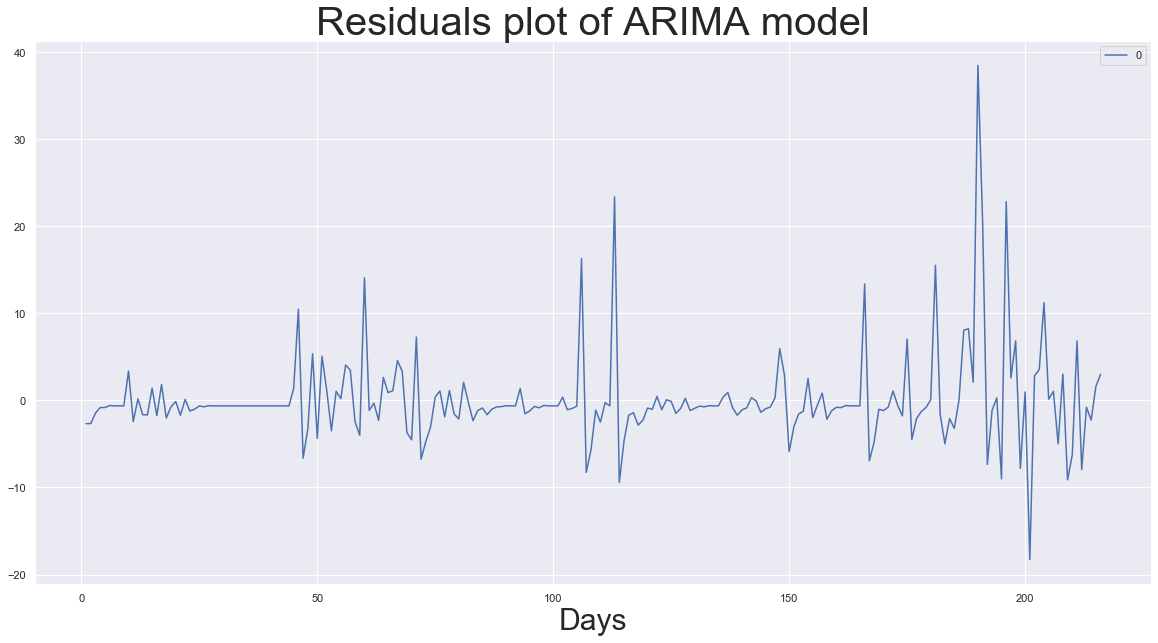

In [26]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.xlabel("Days",size = 30)
plt.title("Residuals plot of ARIMA model",size = 40)
pyplot.show()

Đầu tiên, ta nhận được một biểu đồ đường biểu thị các lỗi còn sót lại (residual errors), cho thấy rằng có thể vẫn còn một số thông tin xu hướng không được mô hình nắm bắt.

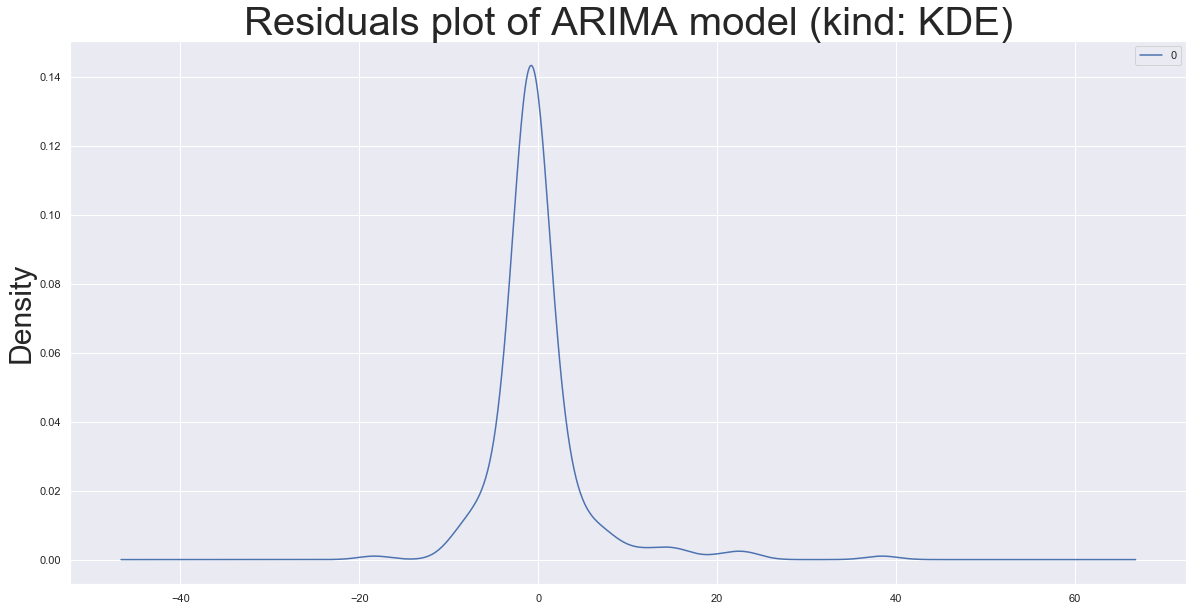

In [27]:
residuals.plot(kind='kde')
plt.title("Residuals plot of ARIMA model (kind: KDE)",size = 40)
plt.ylabel("Density",size = 30)
pyplot.show()

Tiếp theo, ta nhận được một biểu đồ mật độ (density plot) của các giá trị lỗi còn lại, cho thấy các lỗi là Gaussian, nhưng có thể không tập trung vào 0.

In [28]:
print(residuals.describe())

                0
count  216.000000
mean     0.029679
std      5.366514
min    -18.278373
25%     -1.606271
50%     -0.634364
75%      0.316210
max     38.448373


Kết quả trên chỉ sự phân bố của các lỗi còn sót lại (residual errors) cho thấy rằng thực sự có sự sai lệch trong dự đoán (giá trị trung bình (mean) khác 0).

--------------------------------

# 4. Nhìn lại quá trình làm đồ án:

Qua quá trình làm, ta thấy 1 số mặt thuận lợi và khó khăn:

> **Thuận lợi**:

    Dữ liệu tốt, đáng tin cậy, dễ xử lý
    
    Dung lượng bộ dữ liệu nhỏ nên việc phân tích và dự đoán không mất nhiều thời gian
    
    Bộ dữ liệu trực quan dễ hiểu
    
    
> **Khó khăn**:

    Bộ dữ liệu ban đầu gồm 8 file tuy nhiên phần lớn các file có nhiều missing value nên khó khăn trong việc phân tích, ta chỉ  chọn được duy nhất 1 file ổn định để tiến hành phân tích
    
    dữ liệu từ các file khá trùng lặp với nhau nên ta chọn file cơ bản nhất cũng bao hàm toàn bộ dữ liệu
    

### Những điều học được 

Sau khi hoàn thiện đồ án, em cảm thấy học được một số điều:
1. Kiến thức về các pandas, numpy, plotly, ARIMA,... library được cải thiện.
2. Khả năng xử lý dữ liệu để trực quan hóa, chọn plot để thể hiện tốt dữ liệu.

**nếu có thêm thời gian** ta sẽ đi sâu phân tích thêm các nước tiêu biểu về dịch trên thế giới như US, Italy, Spain,... để có cái nhìn toàn diện về tình hình dịch trên thế giới.

## Tài liệu tham khảo
Một số nguồn tài liệu tham khảo:
1. [Pandas](https://pandas.pydata.org/docs/)
2. [Numpy](https://numpy.org/devdocs/index.html)
3. [Matplotlib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)
4. [Stack overflow](https://stackoverflow.com/)

---------------